# Project: Patients that don't go to the appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela

scholarship variable means this concept [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

### Data Dictionary
<ul>
<li>01 - `PatientId` = Identification of a patient</li>
<li>02 - `AppointmentID` = Identification of each appointment</li>
<li>03 - `Gender` = Male or Female.</li>
<li>04 - `ScheduledDay` = The day of the actual appointment, when they have to visit the doctor.</li>
<li>05 - `AppointmentDay` = The day someone called or registered the appointment, this is before appointment of course.</li>
<li>06 - `Age` = How old is the patient.</li>
<li>07 - `Neighbourhood` = Where the appointment takes place.</li>
<li>08 - `Scholarship` = True of False . Observation about [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)</li>
<li>09 - `Hipertension` =  True or False</li>
<li>10 - `Diabetes` = True or False</li>
<li>11 - `Alcoholism` = True or False</li>
<li>12 - `Handcap` = True or False</li>
<li>13 - `SMS_received` =  1 or more messages sent to the patient.</li>
<li>14 - `No-show` = True or False.</li>
</ul>

### Questions

(1) On average, what percentage of patients miss an appointment?

(2) On average, how many days are scheduled before the appointment takes place (difference in days between the appointment and the appointment)?

(3) How many different patients were missing at least one appointment?

(4) What neighborhood received the most patient? and which is the smallest?

(5) Average age of patients that miss appointments?

(6) Are there some correlation between variables?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

There are total 14 columns in the given data set. There are 110.527 rows.

No null values are present in chosen dataset!

For further analysing of data need to drop unused columns, drop duplicate rows and rows with null values for genres since it is used for answering some of the above questions.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = '/home/renato/ENV/Udacity - Data Analyst/second project - Data Analysis//'
file = 'noshowappointments-kagglev2-may-2016.csv'

In [3]:
df = pd.read_csv(path+file)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
#verify if the dataset have duplicated
df.duplicated().sum(axis=0)

0

In [6]:
#how many patients are unique? 
df.PatientId.nunique()

62299

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

In this section we're going to sift through data . Remove unused columns,Remove duplicate rows and remove rows with invalid values to make a cleaner data set for analysis, alter type of data.


In [8]:
#transform the appointment and schedule day in the type datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
#drop the columns appointmentID because don't interresting
df.drop(columns=['AppointmentID'], inplace=True)

In [10]:
#Transform the information about the patient missing the medical appointment in boolean
df['NoShow'] = df['No-show'].replace({'No' : 0, 'Yes' : 1} )

In [11]:
convert_dict = {'Scholarship' : bool, 'Hipertension' : bool, 'Diabetes' : bool, 'Alcoholism' : bool, 'Handcap' : bool,
     'NoShow': bool}

In [12]:
df = df.astype(convert_dict)

In [13]:
df['Neighbourhood'] = df['Neighbourhood'].apply(lambda x : x.capitalize())

In [14]:
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,NoShow
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,Jardim da penha,False,True,False,False,False,0,No,False
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,Jardim da penha,False,False,False,False,False,0,No,False


In [15]:
df['Gender'].value_counts(normalize=True)

F    0.649977
M    0.350023
Name: Gender, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: On average, what percentage of patients miss an appointment?

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df['NoShow'].mean()

0.20193255946510807

In [30]:
df.count()['PatientId']*0.2

22105.4

**The Data set points out that approximately 20% of consultations are not performed, due to the patient's absence. This represents that approximately 22105 queries are not effective**

### Research Question 2: On average, how many days are scheduled before the appointment takes place (difference in days between the appointment and the appointment)?


In [18]:
df['Timespan']= (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Timespan'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Timespan, dtype: float64

In [19]:
df[df['Timespan'] > 0]['Timespan'].mean()

15.785590147724209

**In order to check how long, in days, consultations are scheduled and carried out, we make the difference between the scheduling date and the appointment that is `9 days`.**

### Research Question 3: How many different patients were missing at least one appointment?

In [20]:
df[df['No-show'] == 'Yes']['PatientId'].nunique()

17663

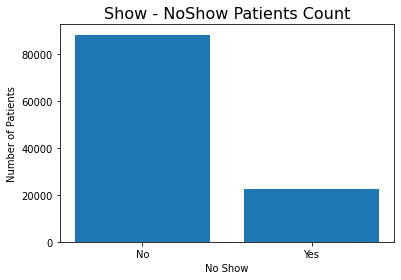

In [21]:
# plotting patient count by Noshow data.
plt.bar(df['No-show'].unique(), df['No-show'].value_counts())
plt.title("Show - NoShow Patients Count", size='16')
plt.ylabel("Number of Patients")
plt.xlabel("No Show")
plt.show()

In [31]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

**We can assess that 17663 patients have already missed the appointment, at least once.**

### Research Question 4:  What neighborhood received the most patient? and which is the smallest?

In [23]:
df.Neighbourhood.value_counts().reset_index()

,index,Neighbourhood
0,Jardim camburi,7717
1,Maria ortiz,5805
2,Resistência,4431
3,Jardim da penha,3877
4,Itararé,3514
...,...,...
76,Ilha do boi,35
77,Ilha do frade,10
78,Aeroporto,8
79,Ilhas oceânicas de trindade,2


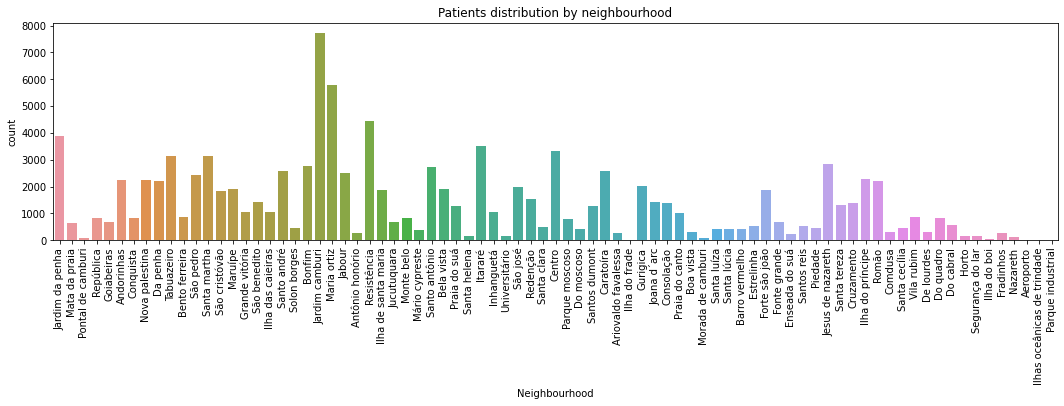

In [24]:
#plotting number of patients from each neighbourhood
plt.figure(figsize=(18,4))
plt.title('Patients distribution by neighbourhood')
sns.countplot(x=df.Neighbourhood, data=df);
plt.xticks(rotation='90')

plt.show()

We currently have 79 neighborhoods serving the population, we found that **`Jardim Camburi`** is the neighborhood that receives the most patients, while the **` Parque Industrial`** is the one that receives the least patients.



### Research Question 5: Average age of patients that miss appointments?

In [25]:
np.mean(df[df['No-show'] == 'Yes']['Age'])

34.31766656212196

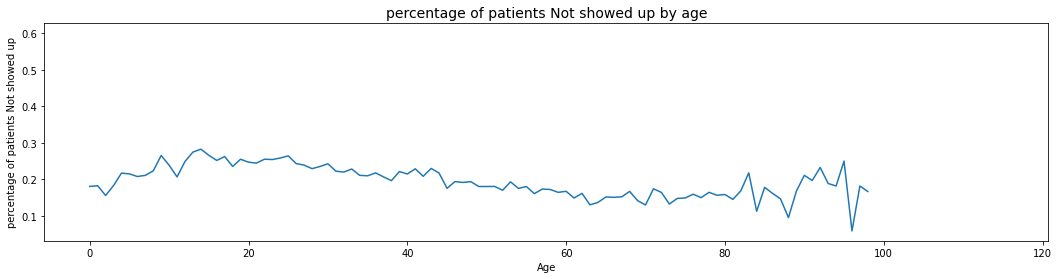

In [26]:
#plotting percentage of patients Not showed up by age
plt.figure(figsize=(18,4))
Age_ratio = df[df['No-show'] == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size()
Age_ratio.plot()
plt.title('percentage of patients Not showed up by age', size='14')
plt.ylabel("percentage of patients Not showed up")
plt.show()

**The average age of patients who normally miss a doctor's appointment is about 34 years old.**

### Research Question 5: Is there a correlation between variables?

In [27]:
# zero_one function to convert a column with 2 values to zeros and ones
def zero_one(data, column):
    """
    This function turns a dataframe's column with 2 values into zeros and ones.
    
    Key Arguments:
    data   -- a Dataframe 
    column -- column name dtype(string) 
    """
    data[column].replace({data[column].unique()[0]:0, data[column].unique()[1]:1}, inplace=True)
    
# making a copy of the Dataframe for correlation heatmap 
df_corr = df.copy()

# Changing NoShow and Gender values to zeros and ones 
zero_one(df_corr, 'NoShow')
zero_one(df_corr, 'Gender')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

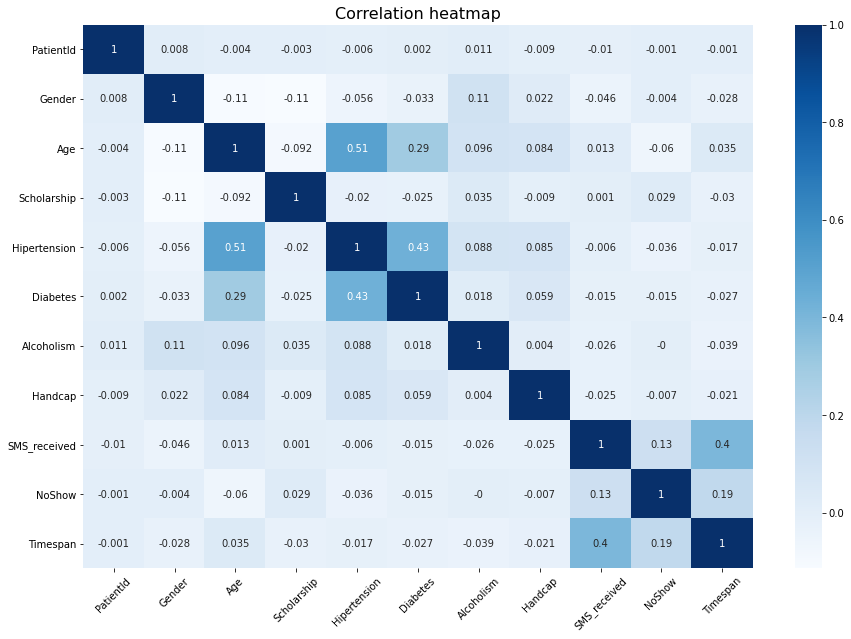

In [28]:
#plotting correlation matrix

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr().round(3), annot = True, cmap='Blues')
plt.title('Correlation heatmap', size='16')
plt.xticks(rotation='45')

**We also found that the difference between the scheduling date and the appointment date has negative values, indicating an inconsistency of information.**

**In order to identify whether any disease or condition of the patient is influenced by age, we will try to understand from the correlation and obtain the following result:**

- `Hypertension and age (0.51)`
- `Diabetes and age (~ 0.3)`.

<a id='conclusions'></a>
## Conclusions


1. 1. In the data set for scheduling appointments, we evaluated some relevant aspects about people who miss appointments, such as the percentage of missing people, how many people missed at least once and the average age. We found that approximately `20%` of patients miss the appointment and the average age of the missing patients is `34` years and it's points out that `17,663` have already missed the consultation at least once.


2. In order to check how long, in days, consultations are scheduled and carried out, we make the difference between the scheduling date and the appointment that is `9 days`.


3. Regarding the neighborhood, we found that **`Jardim Camburi`** is the neighborhood that receives the most patients, while the **`Parque Industrial`** is the one that receives the least patients.


4. In order to identify whether any disease or condition of the patient is influenced by age, we will try to understand from the correlation and obtain the following result:
        We found that there is a strong correlation between: 
        - Hypertension and age, with a coefficient of 0.51
        - Diabetes and age, with a coefficient of 0.3. 
        We also found that hypertension is related to diabetes.

**Limitations**


1. There are some limitations. Above obs\ervations may not be accurate, as statistical methods are not used to infer information and only basic visualizations are used. Further analysis is required to produce accurate information.


2. We also found that the difference between the scheduling date and the appointment date has negative values, indicating an inconsistency of information.